This Jupyter notebook details theoretically the architecture and the mechanism of the Convolutional Neural Network (ConvNet) step by step. Then, we implement the CNN code for multi-class classification task using pytorch. <br> 
The notebook was implemented by <i>Nada Chaari</i>, PhD student at Istanbul Technical University (ITU). <br>

# Table of Contents:

    1)Convolution layer
        1-1) Input image 
        1-2) Filter
        1-3) Output image
        1-4) Multiple filters
        1-5) One-layer of a convolutional neural network
    2)Pooling layer
    3)Fully connected layer
    4)Softmax
    5)Application of CNN using CIFAR dataset
            5-1) Dataset
            5-2) Load and normalize the CIFAR10 training and test datasets 
            5-3) Define a Convolutioanl Neural Network
            5-4) Define a Loss function and optimizer
            5-5) Train the CNN
            5-6) Test the network on the test data

Sources used to build this Jupiter Notebook:
* https://towardsdatascience.com/understanding-images-with-skimage-python-b94d210afd23
* https://gombru.github.io/2018/05/23/cross_entropy_loss/
* https://medium.com/@toprak.mhmt/activation-functions-for-deep-learning-13d8b9b20e
* https://github.com/python-engineer/pytorchTutorial/blob/master/14_cnn.py  
* https://medium.com/machine-learning-bites/deeplearning-series-convolutional-neural-networks-a9c2f2ee1524
* https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31

# CNN (ConvNet) definition

Convolutional Neural Network is a sequence of layers made up of neurons that have learnable weights and biases. Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linearity. The whole network still expresses a single differentiable score function: from the raw image pixels on one end to class scores at the other. CNNs have a loss function (e.g. SVM/Softmax) on the last (fully-connected) layer.

* There are 3 types of layers to build the ConvNet architectures:
    * Convolution (CONV)
    * Pooling (POOL)
    * Fully connected (FC)

# 1) Convolution layer

## 1-1) Input image 

* Image with color has three channels: red, green and blue, which can be represented as three 2d-matrices stacked over each other (one for each color), each having pixel values in the range 0 to 255.

<img src='https://miro.medium.com/max/1400/1*icINeO4H7UKe3NlU1fXqlA.jpeg' width='400'  align="center">

## 1-2) Filter

<img src='https://miro.medium.com/max/933/1*7S266Kq-UCExS25iX_I_AQ.png' width='500'  align="center">

* In the filter the value '1' allows filtering brightness, 
* While '-1' highlights the darkness,
* Furthermore, '0' highlights the grey.

* The convolution layer in the case of a ConvNet extracts features from the input image:
    * choose a filter (kernel) of a certain dimension
    * slide the filter from the top left to the right until we reach the bottom of the image.
* The convolution operation is an element-wise multiplication between the two matrices (filter and the part of the image) and an addition of the multiplication outputs.

* The final integer of this computation forms a single element of the output matrix.

* Stride: is the step that the filter moves horizontally and vertically by pixel.
In the above example, the value of a stride equal to 1.

Because the pixels on the edges are “touched” less by the filter than the pixels within the image, we apply padding.

* Padding: is to pad the image with zeros all around its border to allow the filter to slide on top and maintain the output size equal to the input

<img src='https://miro.medium.com/max/684/1*PBnmjdDqn-OF8JEyRgKm9Q.png' width='200'  align="center">

<font color='red'> Important </font>: The goal of a convolutional neural network is to learn the values of filters. They are treated as parameters, which the network learns using backpropagation.

## 1-3) Output image 

The size of the output image after applying the filter, knowing the filter size (f), stride (s), pad (p), and input size (n) is given as:

<img src='https://miro.medium.com/max/933/1*rOyHQ2teFXX5rIIFHwYDsg.png' width='400'  align="center">

<img src='https://miro.medium.com/max/933/1*IBWQJSnW19WIYsObZcMTNg.png' width='500'  align="center">

## 1-4) Multiple filters

We can generalize the application of one filter at a time to multiple filters to detect several different features. This is the concept for building convolutional neural networks. Each filter brings its own output and we stack them all together and create an output volume, such as:

<img src='https://miro.medium.com/max/933/1*ySaRmKSilLahyK2WxXC1bA.png' width='500'  align="center">

The general formula of the output image can be written as: 

<img src='https://miro.medium.com/max/933/1*pN09gs3rXeTh_EwED1d76Q.png' width='500'  align="center">

where nc is the number of filters

## 1-5) One-layer of a convolutional neural network

The final step that takes us to a convolutional neural layer is to add the bias and a non-linear function.

The goal of the activation function is to add a non-linearity to the network so that it can model non-linear relationships. The most used is Rectified Linear (RELU) defined as max(0,z) with  thresholding at zero. This function assigns zeros to all negatives inputs and keep the same values to the positives inputs. This leaves the size of the output volume unchanged ([4x4x1]).

<img src='https://miro.medium.com/max/933/1*LiBZo_FcnKWqoU7M3GRKbA.png' width='300'  align="center">

<img src='https://miro.medium.com/max/933/1*EpeM8rTf5RFKYphZwYItkg.png' width='500'  align="center">

The parameters involved in one layer are the elements forming the filters and the bias.
Example: if we have 10 filters that are of size 3x3x3 in one layer of a neural network. Each filter has 27 (3x3x3) + 1 bias => 28 parameters. Therefore, the total amount of parameters in the layer is 280 (10x28).

##  Deep Convolutional Network

<img src='https://miro.medium.com/max/933/1*PT1sP_kCvdFEiJEsoKU88Q.png' width='600'  align="center">

# 2) Pooling layer

Pooling layer performs a downsampling operation by progressively reducing the spatial size of the representation (input volume) to reduce the amount of learnable parameters and thus the computational cost; and to avoid overfitting by providing an abstracted form of the input. The Pooling Layer operates independently on every depth slice of the input and resizes it.

There are two types of pooling layers: max and average pooling.

* Max pooling: a filter which takes take the largest element within the region it covers.
* Average pooling: a filter which retains the average of the values encountered within the region it covers.

Note: pooling layer does not have any parameters to learn. 

<img src='https://miro.medium.com/max/933/1*voEBfjohEDVRK7RpNvxd-Q.png' width='300'  align="center">

# 3) Fully connected layer

Fully connected layer (FC) is a layer where all the layer inputs are connectd to all layer outputs. In classification task, FC is used to extract features from the data to make the classification work. Also, FC computes the class scores to classifier the data. In general, FC layer is added to make the model end-to-end trainable by learning a function between the high-level features given as an output from the convolutional layers.

<img src='https://miro.medium.com/max/933/1*_l-0PeSh3oL2Wc2ri2sVWA.png' width='600'  align="center">

It’s common that, as we go deeper into the network, the sizes (nh, nw) decrease, while the number of channels (nc) increases.

# 4) Softmax 

The softmax function is a type of a sigmoid function, not a loss, used in classification problems. The softmax function is ideally used in the output layer of the classifier where we are actually trying to get the probabilities to define the class of each input. 

The Softmax function cannot be applied independently to each $s_i$, since it depends on all elements of $s$. For a given class $s_i$, the Softmax function can be computed as:

$$ f(s)_{i} = \frac{e^{s_{i}}}{\sum_{j}^{C} e^{s_{j}}} $$

Where $s_j$ are the scores inferred by the net for each class in C. Note that the Softmax activation for a class $s_i$ depends on all the scores in $s$.

So, if a network with 3 neurons in the output layer outputs [1.6, 0.55, 0.98], then with a softmax activation function, the outputs get converted to [0.51, 0.18, 0.31]. This way, it is easier for us to classify a given data point and determine to which category it belongs.

<img src='https://gombru.github.io/assets/cross_entropy_loss/intro.png' width='400'  align="center">

# 5)  Application of CNN using CIFAR dataset

## 5-1) dataset

For the CNN application, we will use the CIFAR10 dataset. It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

<img src='https://cs231n.github.io/assets/cnn/convnet.jpeg' width='600'  align="center">

## 5-2) Load and normalize the CIFAR10 training and test datasets using torchvision

In [1]:
import torch
import torchvision # torchvision is for loading the dataset (CIFAR10) 
import torchvision.transforms as transforms # torchvision.transforms is for data transformers for images
import numpy as np

In [2]:
# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

In [3]:
# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:
#  A CIFAR10 dataset are available in pytorch. We load CIFAR from torchvision.datasets
# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform) 

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# We define the pytorch data loader so that we can do the batch optimazation and batch training
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)
# Define the classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## 5-3) Define a Convolutional Neural Network

In [5]:
import torch.nn as nn # for the the neural network 
import torch.nn.functional as F # import activation function (relu; softmax)

In [6]:
# Implement the ConvNet 
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # create the first conv layer-- 3: num of channel; 6: output layer; 5: kernel size
        self.pool = nn.MaxPool2d(2, 2) # create the first pool layer -- 2: kernel size; 2: stride size
        self.conv2 = nn.Conv2d(6, 16, 5) # create the second conv layer -- 6: the input channel size must be equal to the last output channel size; 16: the output; 5: kernel size 
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # # create the FC layer (classification layer) to flattern 3-d tensor to 1-d tensor
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> size of x: [3, 32, 32]
        x = self.pool(F.relu(self.conv1(x)))  # -> size of x: [6, 14, 14] # call an activation function (relu)
        x = self.pool(F.relu(self.conv2(x)))  # -> size of x: [16, 5, 5]
        x = x.view(-1, 16 * 5 * 5)            # -> size of x: [400]
        x = F.relu(self.fc1(x))               # -> size of x: [120]
        x = F.relu(self.fc2(x))               # -> size of x: [84]
        x = self.fc3(x)                       # -> size of x: [10]
        return x

In [7]:
# Create the model
model = ConvNet()

<img src='https://miro.medium.com/max/933/1*rOyHQ2teFXX5rIIFHwYDsg.png' width='400'  align="center">

## 5-4)  Define a Loss function and optimizer

In [8]:

# Create the loss function (multiclass-classification problem)--> CrossEntropy
criterion = nn.CrossEntropyLoss() # the softmax is included in the loss
# Create the optimizer (use the stochastic gradient descent to optimize the model parameters given the lr)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Stochastic gradient descent (SGD)

Unlike the gradiend descent that takes the sum of squared residuals of all data points for each iteration of the algorithm, which is computaionally costed, SGD randomly picks one data point from the whole data set at each iteration to reduce the computations enormously.

## 5-5)  Train the CNN

In [9]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):# loop over the number of epochs (5)
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images # get the inputs images
        labels = labels # get the inputs labels 

        # Forward pass
        outputs = model(images) # forward: calculate the loss between the predicted scores and the ground truth
        loss = criterion(outputs, labels) # compute the CrossEntropy loss between the predicted and the real labels

        # Backward and optimize
        optimizer.zero_grad() # zero the parameter gradients
        loss.backward()  # the backward propagates the error (loss) back into the network and update each weight and bias for each layer in the CNN using SGD optimizer
        optimizer.step()  # compute the SGD to find the next 

        if (i+1) % 2000 == 0: # print every 2000 mini-batches
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')

Epoch [1/5], Step [2000/12500], Loss: 2.3497
Epoch [1/5], Step [4000/12500], Loss: 2.2971
Epoch [1/5], Step [6000/12500], Loss: 2.2820
Epoch [1/5], Step [8000/12500], Loss: 2.2722
Epoch [1/5], Step [10000/12500], Loss: 2.2366
Epoch [1/5], Step [12000/12500], Loss: 2.1255
Epoch [2/5], Step [2000/12500], Loss: 1.8898
Epoch [2/5], Step [4000/12500], Loss: 2.8444
Epoch [2/5], Step [6000/12500], Loss: 1.5852
Epoch [2/5], Step [8000/12500], Loss: 1.7568
Epoch [2/5], Step [10000/12500], Loss: 1.7472
Epoch [2/5], Step [12000/12500], Loss: 1.4950
Epoch [3/5], Step [2000/12500], Loss: 1.3918
Epoch [3/5], Step [4000/12500], Loss: 1.1707
Epoch [3/5], Step [6000/12500], Loss: 1.3633
Epoch [3/5], Step [8000/12500], Loss: 1.1888
Epoch [3/5], Step [10000/12500], Loss: 1.2995
Epoch [3/5], Step [12000/12500], Loss: 1.2683
Epoch [4/5], Step [2000/12500], Loss: 2.0188
Epoch [4/5], Step [4000/12500], Loss: 1.1306
Epoch [4/5], Step [6000/12500], Loss: 1.5046
Epoch [4/5], Step [8000/12500], Loss: 1.5213
Epoc

## 5-6) Test the network on the test data

In [10]:
# Evaluating the model
with torch.no_grad(): # since we're not training, we don't need to calculate the gradients for our outputs
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        outputs = model(images) # run images through the network and output the probability distribution that image belongs to each class over 10 classes 
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1) # returns the index having the highest probability score of each image over one batch
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item() # returns the number of corrected classified samples in each batch and increment them to the total right classified samples  
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred): # test if the predicted label of a sample is equal to the real label
                n_class_correct[label] += 1 # calculate the number of corrected classified samples in each class
            n_class_samples[label] += 1 # calculate the number of samples in each class (test data)

    acc = 100.0 * n_correct / n_samples # calculate the accuracy classification of the network

In [11]:
outputs

tensor([[-1.6842, -3.7084,  1.3234,  2.7431,  2.4441,  2.3559,  2.9426,  0.8714,
         -2.2512, -3.0369],
        [-1.9072, -4.3147,  2.7707,  3.7801,  1.8912,  4.1183,  0.0313,  3.3546,
         -3.4035, -2.4215],
        [ 1.2983,  1.9861, -0.2302, -0.4804,  1.8494, -0.2348, -0.5466,  1.2893,
         -0.7485, -0.5866],
        [-0.2137, -1.9821,  0.6288,  0.1889,  2.3757,  0.3977,  1.1584,  3.4625,
         -2.3372, -0.6290]])

* We will visualize the outputs which represent the classes probability scores of 4 samples in one batch.
* Each sample has 10 classes probability scores. The index of the class having the highest score will be the predicted value and which will be compared with the ground truth later on.

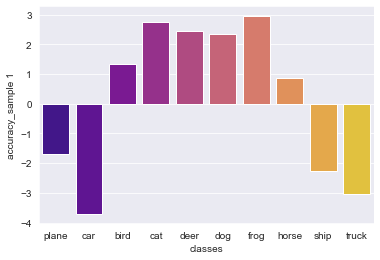

In [14]:
import pandas as pd  # Visualizing Statistical Data 
import seaborn as sns # Visualizing Statistical Data 
df = pd.DataFrame({'accuracy_sample 1': outputs[0, 0:10].tolist(), 'classes': ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'],               })
sns.set_style('darkgrid')
# plot the accuracy classification for each class
sns.barplot(x ='classes', y ='accuracy_sample 1', data = df, palette ='plasma')

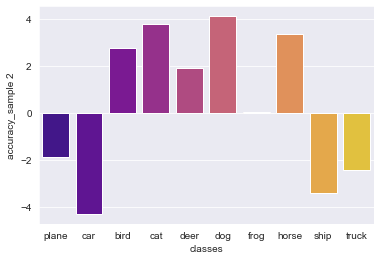

In [15]:
df = pd.DataFrame({'accuracy_sample 2': outputs[1, 0:10].tolist(), 'classes': ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'],               })
sns.set_style('darkgrid')
# plot the accuracy classification for each class
sns.barplot(x ='classes', y ='accuracy_sample 2', data = df, palette ='plasma')

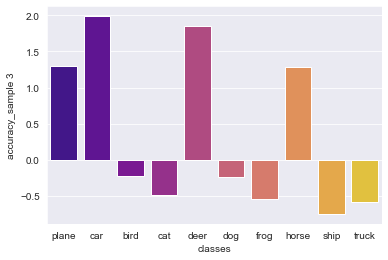

In [16]:
df = pd.DataFrame({'accuracy_sample 3': outputs[2, 0:10].tolist(), 'classes': ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'],               })
sns.set_style('darkgrid')
# plot the accuracy classification for each class
sns.barplot(x ='classes', y ='accuracy_sample 3', data = df, palette ='plasma')

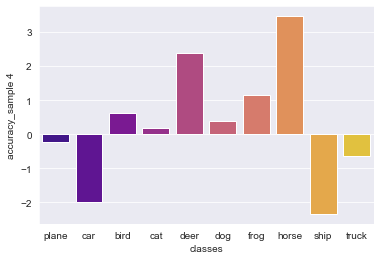

In [17]:
df = pd.DataFrame({'accuracy_sample 4': outputs[3, 0:10].tolist(), 'classes': ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'],               })
sns.set_style('darkgrid')
# plot the accuracy classification for each class
sns.barplot(x ='classes', y ='accuracy_sample 4', data = df, palette ='plasma')

In [18]:
predicted

tensor([6, 5, 1, 7])

In [19]:
labels

tensor([3, 5, 1, 7])

In [20]:
n_samples

10000

In [21]:
n_correct

4971

In [22]:
acc = 100.0 * n_correct / n_samples # calculate the accuracy classification of the network
print('The accuracy classification of the network is:', acc)

The accuracy classification of the network is: 49.71


In [23]:
list_class = []
for i in range(10): # calculate the accuracy classification for each class
    acc = 100.0 * n_class_correct[i] / n_class_samples[i] 
    list_class.append(acc)
    print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of plane: 57.0 %
Accuracy of car: 66.3 %
Accuracy of bird: 26.9 %
Accuracy of cat: 30.4 %
Accuracy of deer: 45.8 %
Accuracy of dog: 34.7 %
Accuracy of frog: 64.0 %
Accuracy of horse: 56.9 %
Accuracy of ship: 58.9 %
Accuracy of truck: 56.2 %


In [24]:
list_class

[57.0, 66.3, 26.9, 30.4, 45.8, 34.7, 64.0, 56.9, 58.9, 56.2]

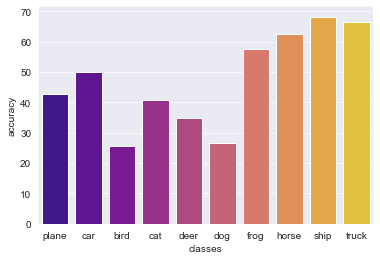

In [25]:
df = pd.DataFrame({'accuracy': [42.6, 49.9, 25.7, 40.9, 34.8, 26.7, 57.6, 62.6, 68.2, 66.4], 'classes': ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'],               })
sns.set_style('darkgrid')
# plot the accuracy classification for each class
sns.barplot(x ='classes', y ='accuracy', data = df, palette ='plasma')

The classes that performed well are: car, ship, frog, plane and horse (choose a threshold rate equal to 0.5).
For the classes that did not perform well are: bird, cat, deer, dog and truck.

Thanks!